# Kaggle - House Price

## Introduction
This document summarize the clean process done to solve the *House Prices: Advanced Regression Techniques* competition in Kaggle. 
Competetion link is in [https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description]. The **Objective** of this competition is to generate a model to estimate the house price of using the given criteria.

## Data Preparation
This part consist of:
- Preparation
- Explore dataset
- Clean dataset

The desired output of this process including:
- List variables taken into account in the modeling process. 

### Import Dataset

In [ ]:
# Import the used packages
import pandas as pd

## Start used to explore missing data
import missingno as msno

## Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

# Need normal distribution to compare to data distribution
from scipy import stats
from scipy.stats import norm

# Model train sample
from sklearn.model_selection import cross_val_score, train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

In [ ]:
train = pd.read_csv('train.csv')
train.tail()

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']

In [15]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········


TIMEOUT: ignored

In [ ]:
test = pd.read_csv('test.csv')
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


#### Checklist
- Import train dataset
Information of the sold houses, including the house criteria and the sold price.
- Train dataset has 81 variables and 1460 rows of information.
- Import test dataset
Information of the criteria desired by the house buyer. House price estimation is requested using the given criteria. 
- Test dataset has 80 variables and 1460 rows of information. 'Sale Price' is not in dataset

### Explore Dataset

#### **Data Structure**

In [ ]:
train.dtypes.value_counts().reset_index()

,index,0
0,object,43
1,int64,35
2,float64,3


Table above shows the data type total summary. At the time, the understood idea to process an information is as follow:
- Object data type.
This data will be used to make a classification.
- Integer data type.
This data will be used to make a reggression. 
- Float data type.
This data is similar to integer, will be used to make a regression.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### *MSSubClass*
According to the data type information from Kaggle. The MSSubClass value is a categorical value of type of dwelling. The dataset should be converted into an object type data from the integer data type.

In [ ]:
train['MSSubClass'].head()

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: int64

In [ ]:
train['MSSubClass'] = train['MSSubClass'].astype('object')
train['MSSubClass'].head()

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: object

In [ ]:
test.MSSubClass.head()

0     20
1     20
2     60
3     60
4    120
Name: MSSubClass, dtype: int64

In [ ]:
test.MSSubClass = test.MSSubClass.astype('object')
test.MSSubClass.head()

0     20
1     20
2     60
3     60
4    120
Name: MSSubClass, dtype: object

After check the other variables data types to the kaggle data information, there is no other variable need to be converted.

#### *Missing Data*

In [ ]:
missing_train = train.isnull().sum().reset_index()
missing_train['dataType'] = train.dtypes.reset_index()[0]

missing_train.columns = ['Var', 'Total', 'dataType']
missing_train[missing_train.Total>0].sort_values(by = 'Total', ascending = False)

,Var,Total,dataType
72,PoolQC,1453,object
74,MiscFeature,1406,object
6,Alley,1369,object
73,Fence,1179,object
57,FireplaceQu,690,object
3,LotFrontage,259,float64
58,GarageType,81,object
59,GarageYrBlt,81,float64
60,GarageFinish,81,object
63,GarageQual,81,object


In [ ]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
test.dtypes.reset_index()[0]

0       int64
1      object
2      object
3     float64
4       int64
       ...   
75      int64
76      int64
77      int64
78     object
79     object
Name: 0, Length: 80, dtype: object

In [ ]:
missing_test = test.isnull().sum().reset_index()
missing_test['dataType'] = test.dtypes.reset_index()[0]

missing_test.columns = ['Var', 'Total', 'dataType']
missing_test[missing_test.Total>0].sort_values(by = 'Total', ascending = False)

,Var,Total,dataType
72,PoolQC,1456,object
74,MiscFeature,1408,object
6,Alley,1352,object
73,Fence,1169,object
57,FireplaceQu,730,object
3,LotFrontage,227,float64
64,GarageCond,78,object
59,GarageYrBlt,78,float64
63,GarageQual,78,object
60,GarageFinish,78,object


.

**MISSINGNO PACKAGE**

An interesting data visualization of missing data can be found by using missingno package. Missing data shown in a map-like row visualization.

##### Train data missing data map

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\missingno\missingno.py:60: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


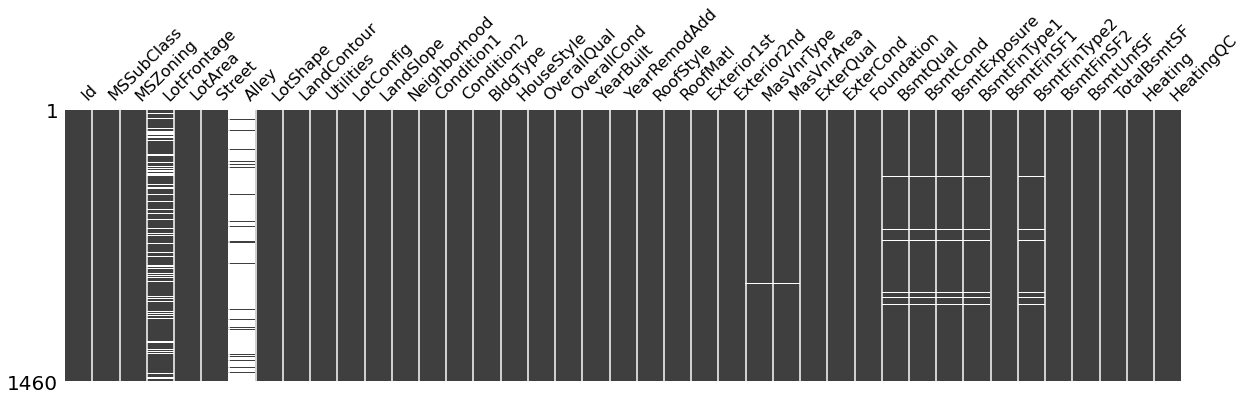

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
msno.matrix(train.iloc[:,:41], ax=ax)

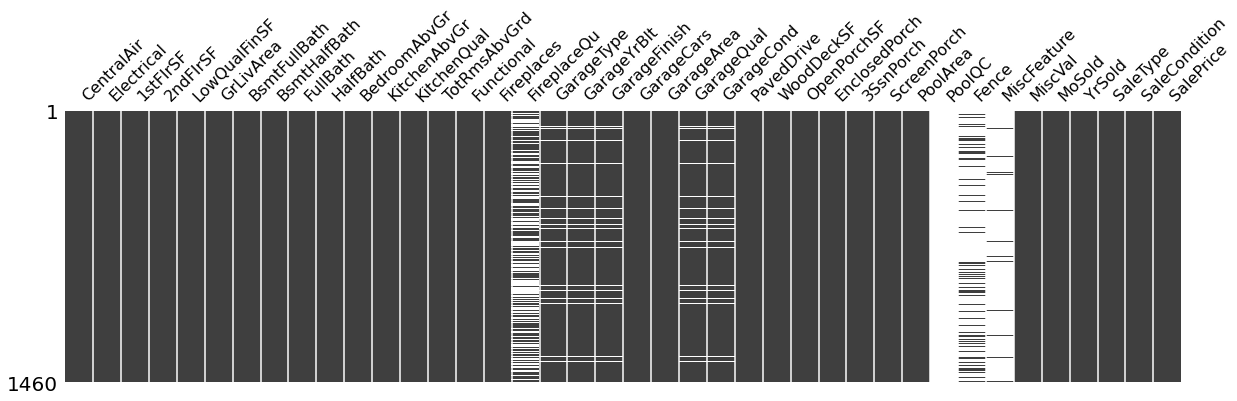

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
msno.matrix(train.iloc[:,41:], ax=ax)

.

##### Test data missing data map

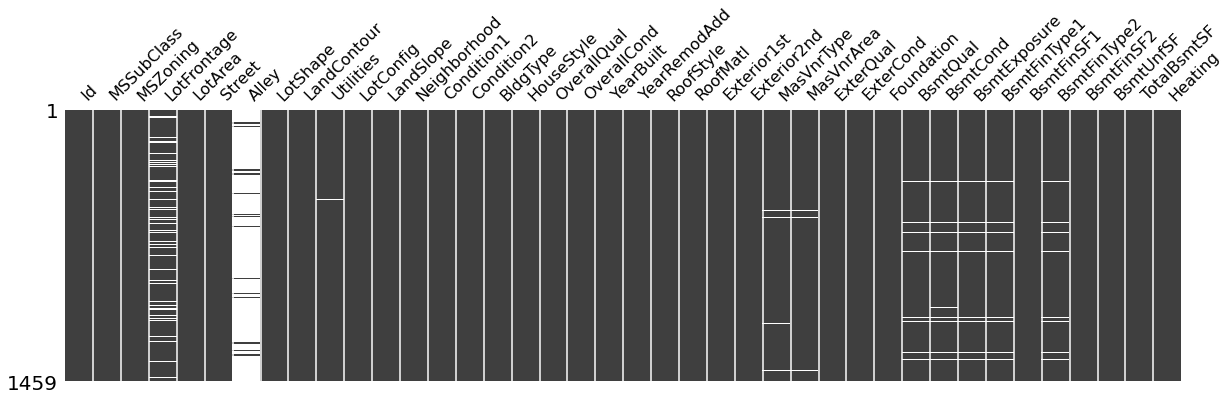

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
msno.matrix(test.iloc[:,:40], ax=ax)

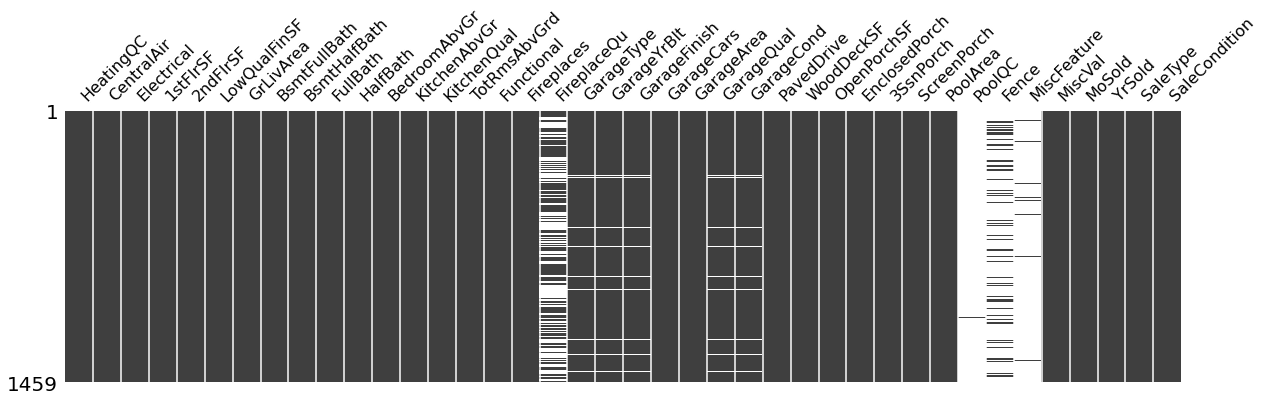

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
msno.matrix(test.iloc[:,40:], ax=ax)

There are group of missing data in train data:
- Mansonry

There are 8 missing row in Masonry Veneer area and type. Both are in the same location 
- Basement

There are up to 38 missing row in basement information and almost all in the same location. But the Basement SF1, SF2, Unfinished SF and total SF are complete.
- Garage

There are 81 missing row in garage all in the same location. But GarageCars and GarageArea are complete.
- Random

PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage has the most missing data. Those value has no pattern compared to others.

Test data has more misssing data compared to train data. Things need to be done to both dataset. But need to look to the data distribution

#### *Data Distribution*
##### *Train dataset-NON Object*

In [ ]:
train_nonObject = train.select_dtypes(exclude='object')
train_nonObject.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Exclude from distplot:
- ID: Not relevant to SalePrice
- Lot area: Too narrow
- Pool Area: Mostly has no pool
- MiscVal: Mostly has no misc value
- MasVnrArea: too narrow
- BasementFinSF1: totalBsmtSF more useful
- BasementFinSF2: totalBsmtSF more useful
- BsmtUnfSF: totalBsmtSF more useful
- 1stFlrSF: GrLivArea more useful
- 2ndFlrSF: GrLivArea more useful
- LowQualFinSF: too narrow
- GarageCars: GarageArea more useful
- GarageYrBuilt: GarageArea more useful

Need to be preprocessed
- OverallQual: not a continuous data
- OverallCond: not a continuous data
- Year Built: not sure what to expect if alone
- Year RemodeAdd: not sure what to expect if alone
- BsmtFullBath, BsmtHalfBath, halfbath, fullbath: Categorical, and better to make aggregate
- BedroomAbvGr: Categorical, better if not alone
- KitchenAbvGr: Categorical, better if not alone
- Fireplaces: Categorical, better if not alone
- WoodDeck: Mostly has no wooddeck
- OpenPorch: Mostly has no porch
- EnclosedPorch: Mostly has no porch
- 3SeasonPorch: Mostly has no porch
- ScreenPorch: Mostly has no porch
- YrSold: Well distributed, better if not alone

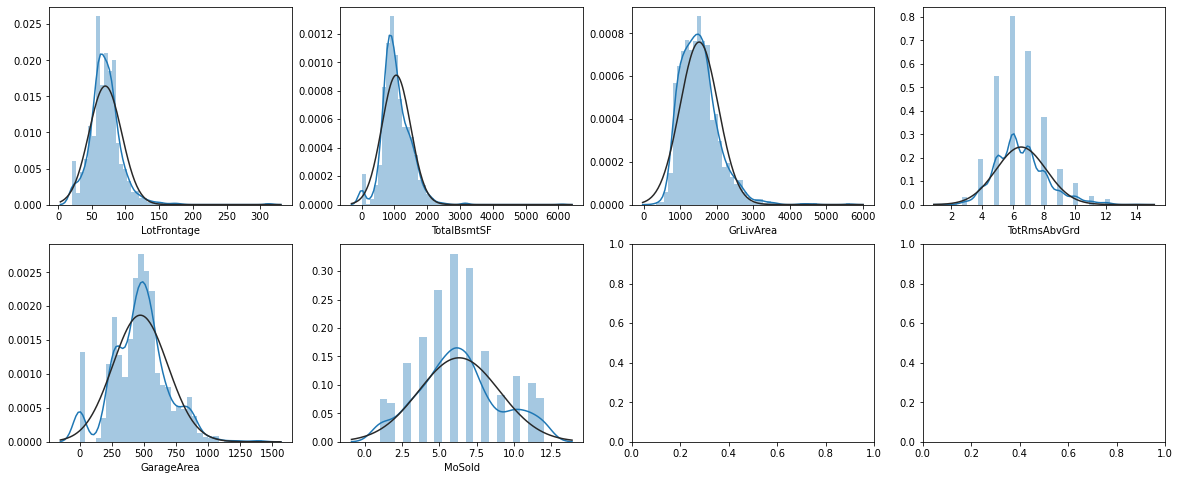

In [ ]:
# All data
label = train_nonObject.iloc[:,:-1].columns

# Filtered with redundant information and not useful information
filt1 = ['Id', 'PoolArea', 'MiscVal', 'MasVnrArea', 'BsmtFinSF1',
         'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'GarageCars', 'GarageYrBlt']

label_1fil = label.drop(filt1)

# Filtered with information which better to be reprocessed
filt2 = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'YrSold', '1stFlrSF', '2ndFlrSF', 'LotArea']

label_2fil = label_1fil.drop(filt2)

# Label used for visualization
a = label_2fil

# row and column
r = (len(a)//4) + 1
c = 4

# Visual
fig, ax = plt.subplots(nrows= r,
                       ncols= c,
                       figsize= (c * 5 ,r * 4))
ax = ax.reshape(r * c)

for x in range(round(len(a))):
    sns.distplot(train_nonObject[a[x]], fit = norm, ax=ax[x])

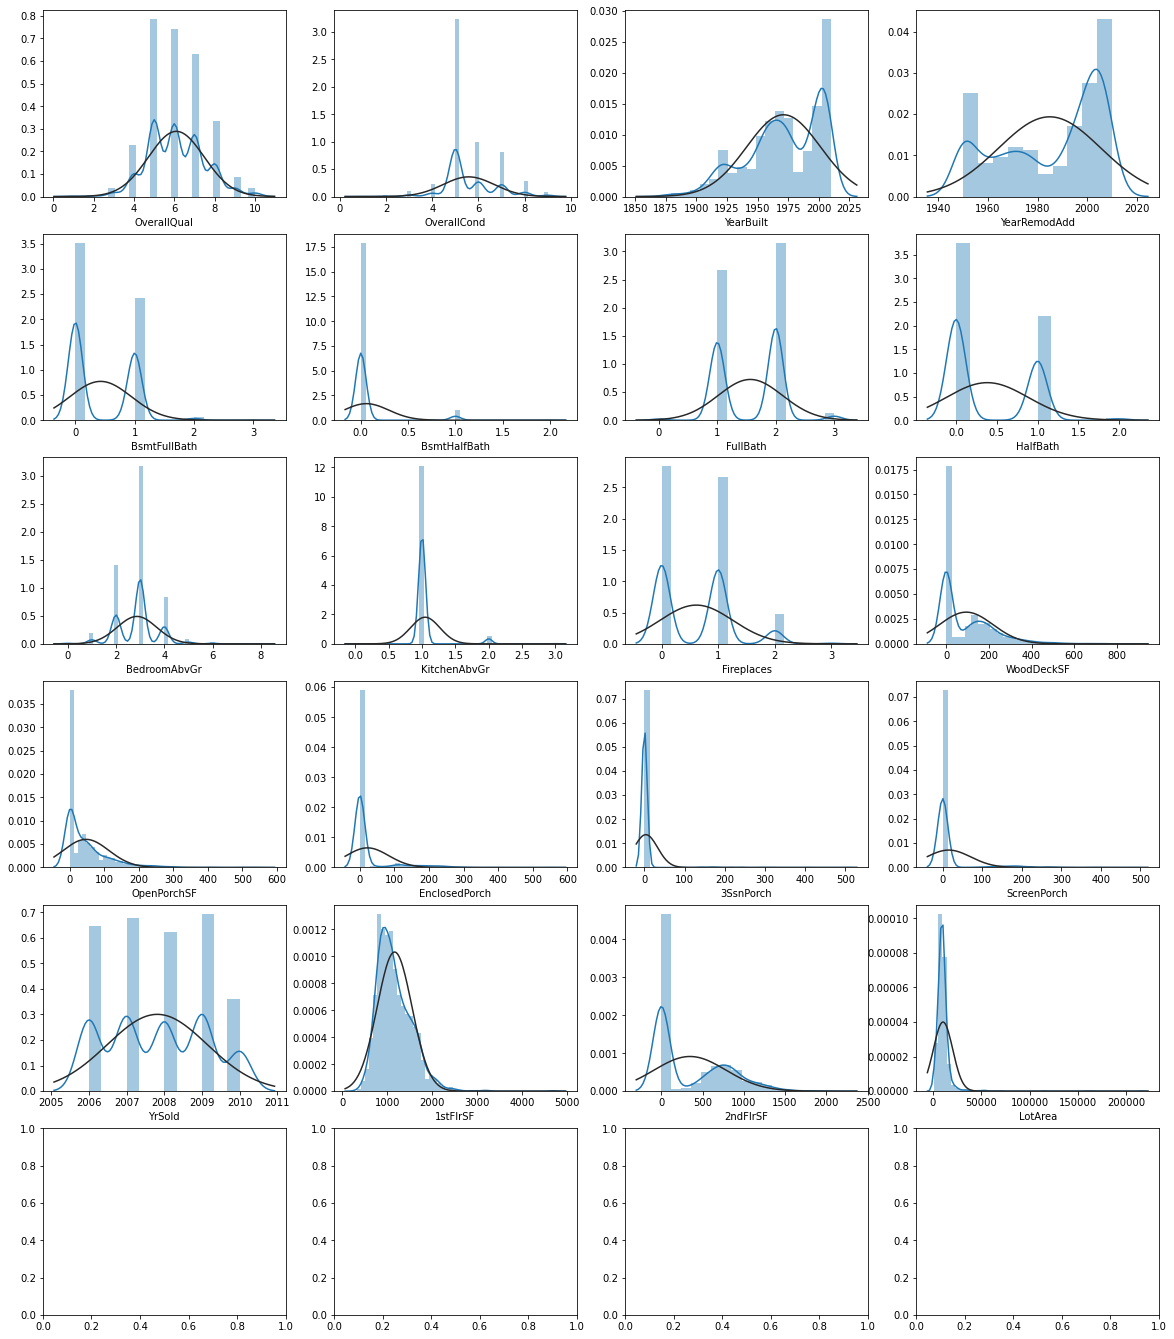

In [ ]:
a = train_nonObject[filt2].columns

# row and column
r = (len(a) // 4) + 1
c = 4

# Visual
fig, ax = plt.subplots(nrows= r,
                       ncols= c,
                       figsize= (c * 5 ,r * 4))
ax = ax.reshape(r * c)

for x in range(round(len(a))):
    sns.distplot(train_nonObject[a[x]], fit = norm, ax=ax[x])

#### Process the filt2 variable

- Year Built: not sure what to expect if alone
- Year RemodeAdd: not sure what to expect if alone
- YrSold: Well distributed, better if not alone

Simplification value range:
- OverallQual: 1 to 4
- OverallCond: 1 to 4
- BsmtFullBath, BsmtHalfBath, halfbath, fullbath. Combined and simplified
- BedroomAbvGr: 1 to 4
- KitchenAbvGr: 0 to 2
- Fireplaces: 0 to 2
- Wooddeck: 0 to 1
- OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch: Combined and simplified

In [ ]:

train_nonObject['OverallCond'] = train_nonObject['OverallCond'].replace({0:1, 1:1, 
                                                                         2:2, 3:2, 4:2, 
                                                                         5:3, 6:3, 7:3, 
                                                                         8:4, 9:4, 10:4})

train_nonObject['SimBath'] = train_nonObject[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']].sum(axis=1)
train_nonObject['SimBath'] = train_nonObject['SimBath'].replace({1:1, 2:1,
                                                                3:2, 4:2,
                                                                5:3, 6:3,
                                                                7:4, 8:4, 9:4})

train_nonObject['BedroomAbvGr'] = train_nonObject['BedroomAbvGr'].replace({0:0,
                                                                          1:1, 2:1, 
                                                                           3:2, 4:2,
                                                                           5:3, 6:2,
                                                                           7:4, 8:4,
                                                                           9:5, 10:5})

train_nonObject['KitchenAbvGr'] = train_nonObject['KitchenAbvGr'].replace({2:2, 3:2, 4:2, 5:2})

train_nonObject['Fireplaces'] = train_nonObject['Fireplaces'].replace({2:2, 3:2, 4:2})

train_nonObject['WoodDeckSF'][train_nonObject['WoodDeckSF'] > 0] = 1

train_nonObject['Porch'] = train_nonObject[['ScreenPorch', 'EnclosedPorch', 'OpenPorchSF', '3SsnPorch']].sum(axis=1)
train_nonObject['Porch'][train_nonObject['Porch'] > 0] = 1

filt2_processed = ['Porch', 'WoodDeckSF', 'Fireplaces', 'KitchenAbvGr', 'BedroomAbvGr',
                  'SimBath', 'OverallCond']
filt2_notproc = ['YearBuilt', 'YearRemodAdd', 'YrSold', 'OverallQual', '1stFlrSF', '2ndFlrSF', 'LotArea']


<ipython-input-21-b7aa45c9f447>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_nonObject['OverallCond'] = train_nonObject['OverallCond'].replace({0:1, 1:1,
<ipython-input-21-b7aa45c9f447>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_nonObject['SimBath'] = train_nonObject[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']].sum(axis=1)
<ipython-input-21-b7aa45c9f447>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [ ]:
final_nonObjVar = list(label_2fil) + filt2_processed + filt2_notproc
train_nonObjectFinal = train_nonObject[final_nonObjVar]
train_nonObjectFinal.head()

,LotFrontage,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,GarageArea,MoSold,Porch,WoodDeckSF,Fireplaces,KitchenAbvGr,BedroomAbvGr,SimBath,OverallCond,YearBuilt,YearRemodAdd,YrSold,OverallQual,1stFlrSF,2ndFlrSF,LotArea
0,65.0,856,1710,8,548,2,1,0,0,1,2,2,3,2003,2003,2008,7,856,854,8450
1,80.0,1262,1262,6,460,5,0,1,1,1,2,2,4,1976,1976,2007,6,1262,0,9600
2,68.0,920,1786,6,608,9,1,0,1,1,2,2,3,2001,2002,2008,7,920,866,11250
3,60.0,756,1717,7,642,2,1,0,1,1,2,1,3,1915,1970,2006,7,961,756,9550
4,84.0,1145,2198,9,836,12,1,1,1,1,2,2,3,2000,2000,2008,8,1145,1053,14260


##### *Train dataset-Object*

In [ ]:
train_object = train.select_dtypes(include='object')
train_object['SalePrice'] = train['SalePrice']

<ipython-input-23-8b6bc61343b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_object['SalePrice'] = train['SalePrice']


In [ ]:
# Get the length and categories of each variables
train_object_var = train_object.columns

# Duplicate list structure
train_object_var_sum = list(train_object_var)

# Fill duplicate list with value of total category 
for i in range(len(train_object_var)):
    train_object_var_sum[i] = len(train_object[train_object_var[i]].unique())

# Create dataframe
train_object_cat_len = pd.DataFrame({
    'Variable': list(train_object_var),
    'CategoryLength': train_object_var_sum})
train_object_cat_len.head()

,Variable,CategoryLength
0,MSSubClass,15
1,MSZoning,5
2,Street,2
3,Alley,3
4,LotShape,4


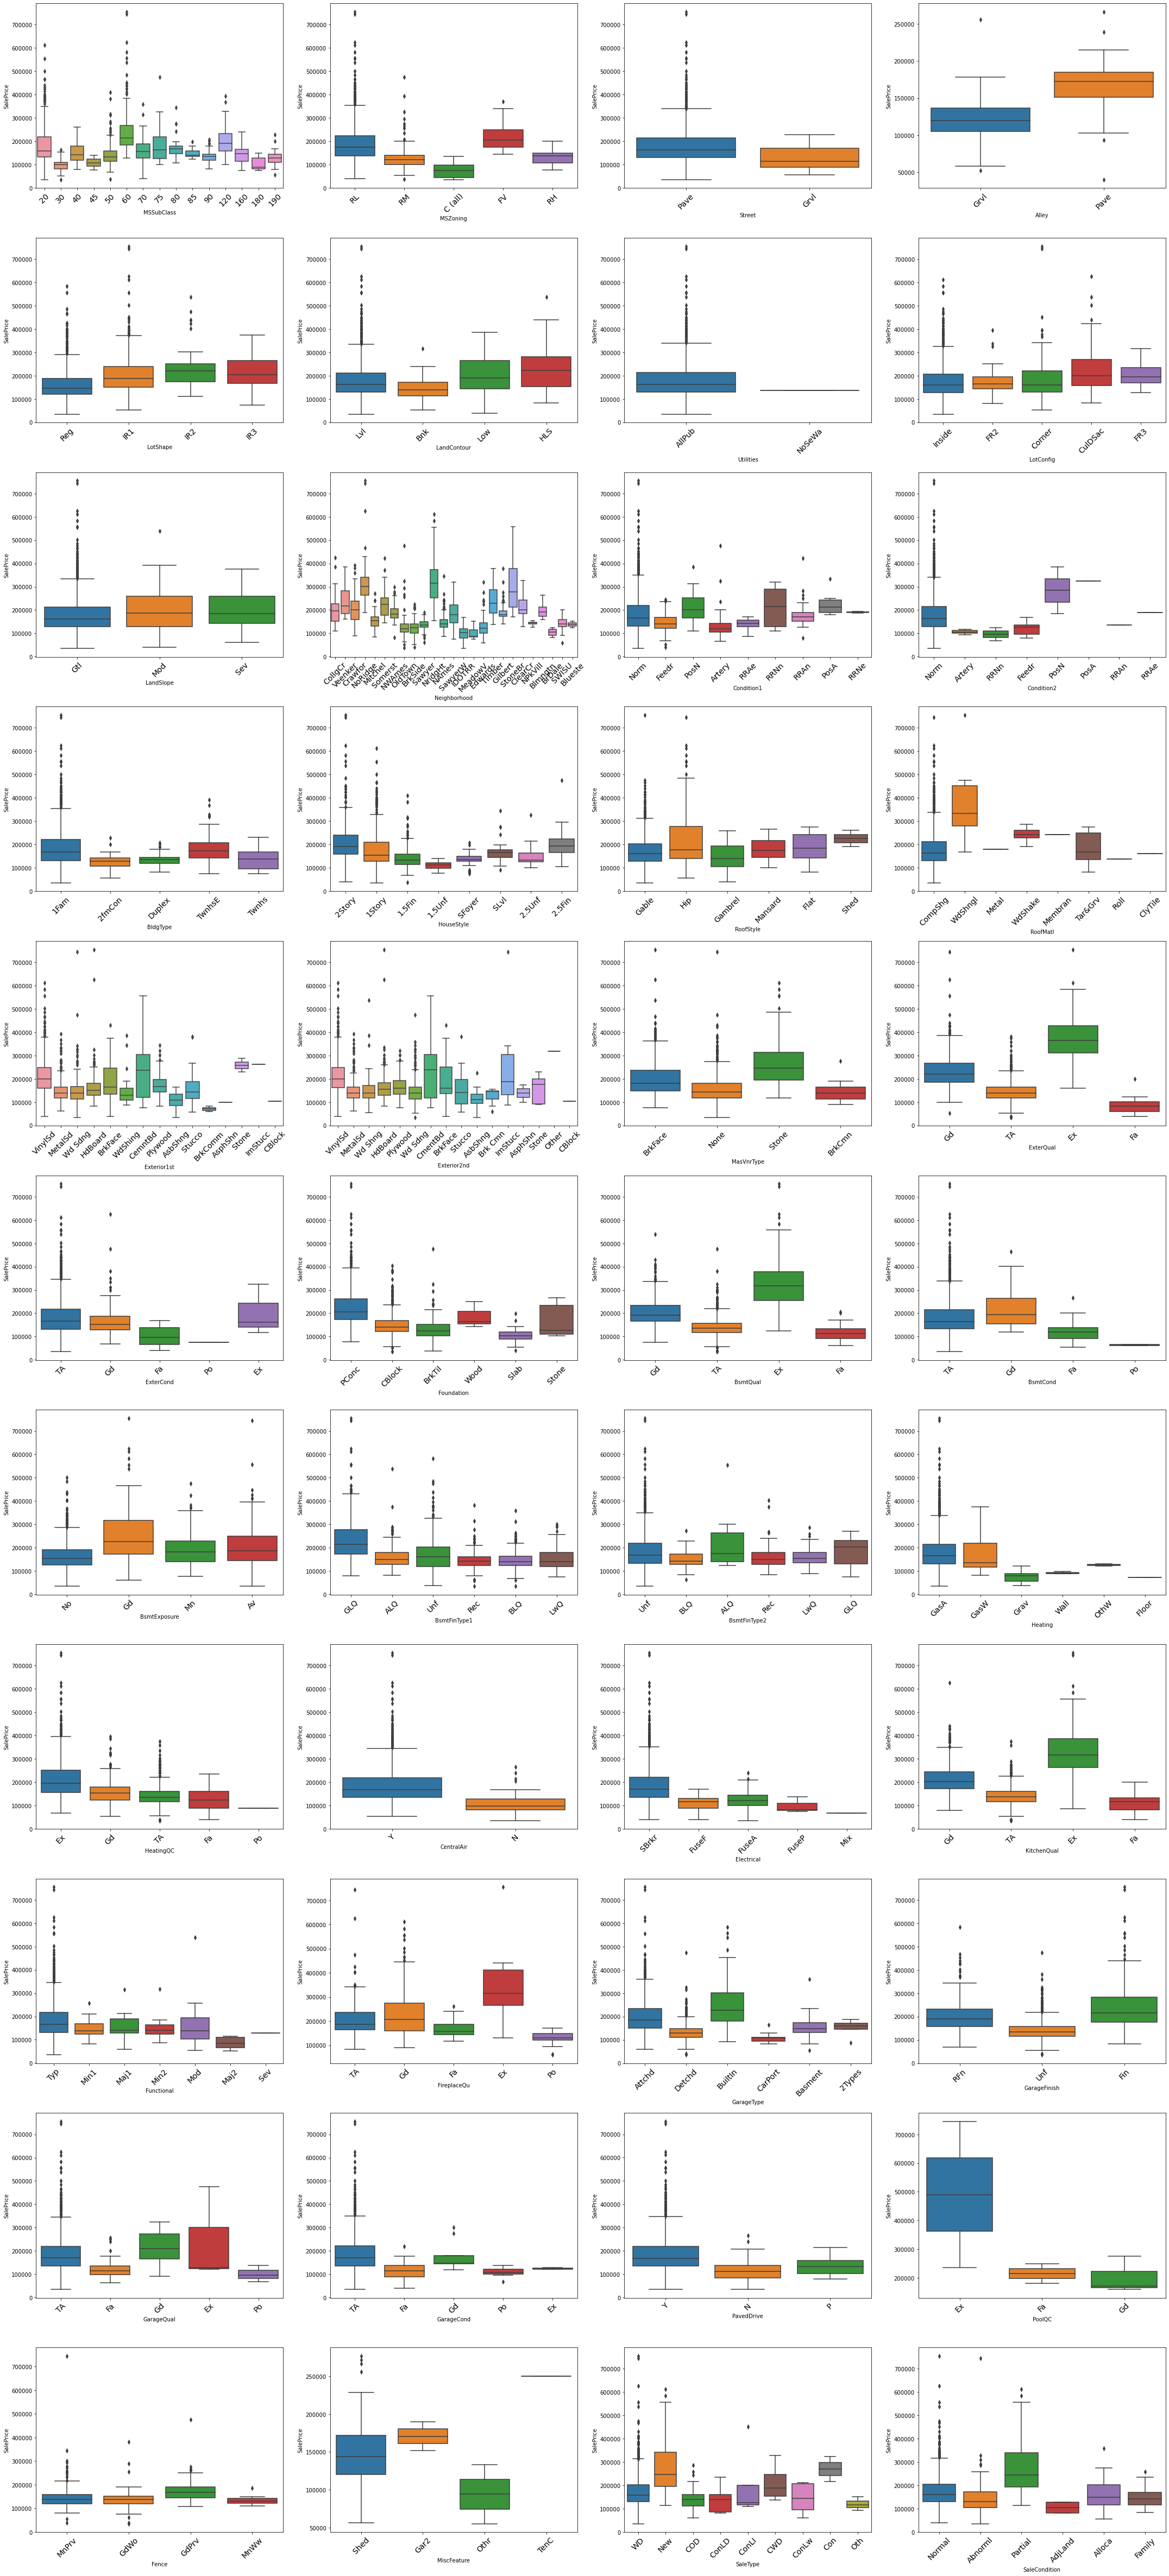

In [ ]:
fig, ax = plt.subplots(11,4, figsize = (30,66))
ax = ax.reshape(44)

for i in range(len(train_object_var)-1):
    plot = sns.boxplot(data=train_object,
               x=train_object[train_object_var[i]],
               y=train_object['SalePrice'],
               ax=ax[i])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45, fontsize='x-large')

plt.tight_layout()
    

In [ ]:
# Replace nan value, as fillna still produce 'nan'

var = train_object.columns

for x in range(len(var)):
    row = train_object[var[x]].isna()
    train_object[var[x]].loc[row] = 0

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-26-4bf75752821e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_object[var[x]].loc[row] = 0


In [ ]:
train_object['MSSubClass'] #Train has value of all categories
train_object['MSZoning'] = train_object['MSZoning'].replace({}) #Train has 5 of 8 categories
train_object['Street'] = train_object['Street'].replace({'Grvl': 1,
                                          'Pave': 2}) # mody data in pave

train_object['LotShape'] = train_object['LotShape'].replace({'IR3': 1,
                                              'IR2': 2,
                                              'IR1': 3,
                                              'Reg': 4}) # All cat has value
train_object['LandContour'] = train_object['LandContour'].replace({'Bnk': 1,
                                                    'Low': 2,
                                                    'HLS': 3,
                                                    'Lvl': 4}) #all ok
train_object['Utilities'] = train_object['Utilities'].replace({'ELO': 1,
                                                'NoSeWa': 2,
                                                'NoSewr': 3,
                                                'AllPub': 4}) # Almost train_object data is in AllPublic utilities
train_object['LotConfig'] = train_object['LotConfig'].replace({'FR3': 1,
                                                'FR2': 2,
                                                'Inside': 3,
                                                'Corner': 4,
                                                'CulDSac': 5}) # All ok
train_object['LandSlope'] = train_object['LandSlope'].replace({'Sev': 1,
                                                'Mod': 2,
                                                'Gtl': 3}) # All ok

# train_object['Neighborhood'] = train_object['Neighborhood'].replace({})

train_object['Condition1Num'] = train_object['Condition1'].replace({'Feedr': 1,
                                                  'Artery': 1,
                                                  'RRAe': 2,
                                                  'RRAn': 2,
                                                  'RRNn': 2,
                                                  'RRNe': 2,
                                                  'PosA': 3,
                                                  'PosN': 3,
                                                  'Norm': 4,
                                                  0: 4}) # 0 change to 4, as 0 value is from fillna function
train_object['Condition2Num'] = train_object['Condition2'].replace({'Feedr': 1,
                                                  'Artery': 1,
                                                  'RRAe': 2,
                                                  'RRAn': 2,
                                                  'RRNn': 2,
                                                  'RRNe': 2,
                                                  'PosA': 3,
                                                  'PosN': 3,
                                                  'Norm': 4,
                                                  0: 4}) # 0 change to 4, as 0 value is from fillna function

# Need to figure a way to combine Condition1 and Condition 2
# After that initial condition1 and condition2 can be dropped

train_object['BldgType'] = train_object['BldgType'].replace({'2fmCon': 1,
                                              'Duplx': 1, 
                                              'TwnhsE': 2,
                                              'TwnhsI': 2,
                                              '1Fam': 3})

train_object['HouseStyle'] = train_object['HouseStyle'].replace({'1Story': 2,
                                                  '1.5Fin': 2,
                                                  '1.5Unf': 2, 
                                                  '2Story': 3,
                                                  '2.5Fin': 3, 
                                                  '2.5Unf': 3,
                                                  'SFoyer': 1,
                                                  'SLvl': 1})

train_object['RoofStyle'] = train_object['RoofStyle'].replace({'Flat': 5, 
                                                'Gable': 2, 
                                                'Gambrel': 3,
                                                'Hip': 1,
                                                'Mansard': 4,
                                                'Shed': 6})

train_object['ExterQual'] = train_object['ExterQual'].replace({'Ex': 5,
                                                'Gd': 4,
                                                'TA': 3,
                                                'Fa': 2,
                                                'Po': 1})

train_object['ExterCond'] = train_object['ExterCond'].replace({'Ex': 5,
                                                'Gd': 4,
                                                'TA': 3,
                                                'Fa': 2,
                                                'Po': 1})

train_object['BsmtQual'] = train_object['BsmtQual'].replace({'Ex': 5,
                                                'Gd': 4,
                                                'TA': 3,
                                                'Fa': 2,
                                                'Po': 1,
                                              'NA': 0})

train_object['BsmtCond'] = train_object['BsmtCond'].replace({'Ex': 5,
                                                'Gd': 4,
                                                'TA': 3,
                                                'Fa': 2,
                                                'Po': 1,
                                               'NA': 0})

train_object['BsmtExposure'] = train_object['BsmtExposure'].replace({'Gd': 4,
                                                       'Av': 3,
                                                       'Mn': 2,
                                                       'No': 1,
                                                       'NA': 0})

train_object['BsmtFinType1'] = train_object['BsmtFinType1'].replace({'GLQ': 5,
                                                       'ALQ': 4,
                                                       'Rec': 3,
                                                       'BLQ': 2,
                                                       'LwQ': 1,
                                                       'Unf': 1,
                                                       'NA': 0})

train_object['BsmtFinType2'] = train_object['BsmtFinType2'].replace({'GLQ': 5,
                                                       'ALQ': 4,
                                                       'Rec': 3,
                                                       'BLQ': 2,
                                                       'LwQ': 1,
                                                       'Unf': 1,
                                                       'NA': 0})

train_object['HeatingQC'] = train_object['HeatingQC'].replace({'Ex': 5,
                                                 'Gd': 4,
                                                 'TA': 3,
                                                 'Fa': 2,
                                                 'Po': 1,})

train_object['CentralAir'] = train_object['CentralAir'].replace({'Y': 1,
                                                  'N': 0})

train_object['Electrical'] = train_object['Electrical'].replace({'SBrkr': 5,
                                                   'FuseA': 4,
                                                   'FuseF': 3,
                                                   'FuseP': 2,
                                                   'Mix': 1,})

train_object['KitchenQual'] = train_object['KitchenQual'].replace({'Ex': 5,
                                                     'Gd': 4,
                                                     'TA': 3,
                                                     'Fa': 2,
                                                     'Po': 1,})

train_object['FireplaceQu'] = train_object['FireplaceQu'].replace({'Ex': 5,
                                                     'Gd': 4,
                                                     'TA': 3,
                                                     'Fa': 2,
                                                     'Po': 1,
                                                    'NA': 0})

train_object['GarageFinish'] = train_object['GarageFinish'].replace({'Fin': 3,
                                                       'RFn': 2,
                                                       'Unf': 1,
                                                       'NA': 0})

train_object['GarageQual'] = train_object['GarageQual'].replace({'Ex': 5,
                                                   'Gd': 4,
                                                   'TA': 3,
                                                   'Fa': 2,
                                                   'Po': 1,
                                                   'NA': 0})

train_object['GarageCond'] = train_object['GarageCond'].replace({'Ex': 5,
                                                   'Gd': 4,
                                                   'TA': 3,
                                                   'Fa': 2,
                                                   'Po': 1,
                                                   'NA': 0})

train_object['PavedDrive'] = train_object['PavedDrive'].replace({'Y': 2,
                                                   'P': 1,
                                                   'N': 0})


<ipython-input-27-e6a4b9115b0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_object['MSZoning'] = train_object['MSZoning'].replace({}) #Train has 5 of 8 categories
<ipython-input-27-e6a4b9115b0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_object['Street'] = train_object['Street'].replace({'Grvl': 1,
<ipython-input-27-e6a4b9115b0b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

List of object not processed replace to numeric
- MSSubClass: Suitable in categorical
- MSZoning: Train data only has 5 of 8 category
- Neigborhood: Too complex
- Condition1: replace is to a new column
- Condition2: replace is to a new column
- Exterior1: too complex
- Exterior2: too complex
- Roof material: Too much, most data in "CompShg"
- Foundation: Most data in "Poured Concrete"
- Heating: High distribution in GasA
- Functional: High distribution on "typical"
- Garage Type: High distribution on "Attached to home"
- Fence: Too many missing value
- Alley: Too many missing value
- MiscFeature: Too many missing value
- PoolQC: Too many missing value
- SaleType: High distribution on WD
- SaleCondition: Relatively high distributed on "normal" type

[ ! ]  **Need to figure a way to make the aggregate value for Condition1Num and Condition2Num**

In [ ]:
final_ObjVar = ['MSSubClass', 'Street', 'LotShape', 'LandContour', 'Utilities',
                'LotConfig', 'LandSlope', 'Condition1Num', 'Condition2Num', 'BldgType',
                'HouseStyle', 'RoofStyle', 'ExterQual', 'ExterCond', 'BsmtQual',
                'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
                'GarageQual', 'GarageCond', 'PavedDrive']
train_objectFinal = train_object[final_ObjVar]
train_objectFinal

,MSSubClass,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1Num,Condition2Num,BldgType,...,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive
0,60,2,4,4,4,3,3,4,4,3,...,1,5,1,5,4,0,2,3,3,2
1,20,2,4,4,4,2,3,1,4,3,...,1,5,1,5,3,3,2,3,3,2
2,60,2,3,4,4,3,3,4,4,3,...,1,5,1,5,4,3,2,3,3,2
3,70,2,3,4,4,4,3,4,4,3,...,1,4,1,5,4,4,1,3,3,2
4,60,2,3,4,4,2,3,4,4,3,...,1,5,1,5,4,3,2,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,2,4,4,4,3,3,4,4,3,...,1,5,1,5,3,3,2,3,3,2
1456,20,2,4,4,4,3,3,4,4,3,...,3,3,1,5,3,3,1,3,3,2
1457,70,2,4,4,4,3,3,4,4,3,...,1,5,1,5,4,4,2,3,3,2
1458,20,2,4,4,4,3,3,4,4,3,...,3,4,1,4,4,0,1,3,3,2


### FinaltrainObject

In [ ]:
train_final = pd.concat([train_nonObjectFinal, train_objectFinal, train['SalePrice']], axis=1)
train_final.head()

,LotFrontage,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,GarageArea,MoSold,Porch,WoodDeckSF,Fireplaces,KitchenAbvGr,...,HeatingQC,CentralAir,Electrical,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,SalePrice
0,65.0,856,1710,8,548,2,1,0,0,1,...,5,1,5,4,0,2,3,3,2,208500
1,80.0,1262,1262,6,460,5,0,1,1,1,...,5,1,5,3,3,2,3,3,2,181500
2,68.0,920,1786,6,608,9,1,0,1,1,...,5,1,5,4,3,2,3,3,2,223500
3,60.0,756,1717,7,642,2,1,0,1,1,...,4,1,5,4,4,1,3,3,2,140000
4,84.0,1145,2198,9,836,12,1,1,1,1,...,5,1,5,4,3,2,3,3,2,250000


In [ ]:
train_final['AllSF'] = train_final['GrLivArea'] + train_final['TotalBsmtSF']

In [ ]:
corrmap = train_final.corr()
corrmap['SalePrice'].sort_values(ascending=False).head()

SalePrice      1.000000
OverallQual    0.790982
AllSF          0.778959
GrLivArea      0.708624
ExterQual      0.682639
Name: SalePrice, dtype: float64

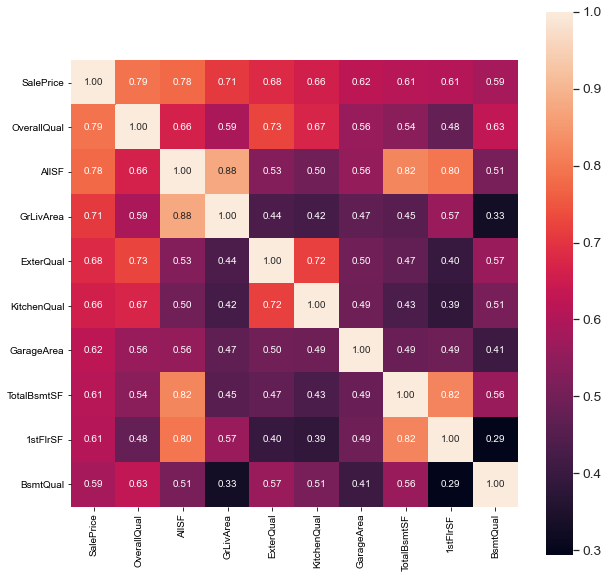

In [ ]:
plt.subplots(figsize = (10,10))
k = 10
cols = corrmap.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_final[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,
                cbar= True,
               annot=True,
               square=True,
               fmt='.2f',
               annot_kws={'size':10},
               yticklabels=cols.values,
               xticklabels=cols.values)


In [ ]:
train_final[cols]

,SalePrice,OverallQual,AllSF,GrLivArea,ExterQual,KitchenQual,GarageArea,TotalBsmtSF,1stFlrSF,BsmtQual
0,208500,7,2566,1710,4,4,548,856,856,4
1,181500,6,2524,1262,3,3,460,1262,1262,4
2,223500,7,2706,1786,4,4,608,920,920,4
3,140000,7,2473,1717,3,4,642,756,961,3
4,250000,8,3343,2198,4,4,836,1145,1145,4
...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,2600,1647,3,3,460,953,953,4
1456,210000,6,3615,2073,3,3,500,1542,2073,4
1457,266500,7,3492,2340,5,4,252,1152,1188,3
1458,142125,5,2156,1078,3,4,240,1078,1078,3


## Modeling -  Direct Linear Regression 

In [ ]:
cols = cols.drop('SalePrice')

In [ ]:

train_input = train_final[cols]
train_input.head()

,OverallQual,AllSF,GrLivArea,ExterQual,KitchenQual,GarageArea,TotalBsmtSF,1stFlrSF,BsmtQual
0,7,2566,1710,4,4,548,856,856,4
1,6,2524,1262,3,3,460,1262,1262,4
2,7,2706,1786,4,4,608,920,920,4
3,7,2473,1717,3,4,642,756,961,3
4,8,3343,2198,4,4,836,1145,1145,4


In [ ]:
# Target variable
target_out = train_final['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(train_input, target_out, test_size = 0.3, random_state = 0)

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1022, 9)
X_test : (438, 9)
y_train : (1022,)
y_test : (438,)


In [ ]:
y_train

64      219500
682     173000
960     116500
1384    105000
1100     60000
         ...  
763     337000
835     128000
1216    112000
559     234000
684     221000
Name: SalePrice, Length: 1022, dtype: int64

In [ ]:
simpleLr = LinearRegression()
simpleLr.fit(X_train, y_train)

LinearRegression()

In [ ]:
simpleLr.score(X_train, y_train)

0.8102951853695004

In [ ]:
y_train_pred = simpleLr.predict(X_train)

In [ ]:
y_test_pred = simpleLr.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_true= y_test, y_pred= y_test_pred))

43587.141552832254

In [ ]:
r2_score(y_true= y_train, y_pred= y_train_pred)

0.8102951853695004

In [ ]:
r2_score(y_true= y_test, y_pred= y_test_pred)

0.7201588888029105

## Predict Test SalePrice

In [ ]:
cols

Index(['OverallQual', 'AllSF', 'GrLivArea', 'ExterQual', 'KitchenQual',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual'],
      dtype='object')

In [ ]:
test['AllSF'] = test['GrLivArea'] + test['TotalBsmtSF']
test_used = test[cols]

In [ ]:
test_missing = test.isna().sum().sort_values(ascending=False).reset_index()
test_missing[test_missing[0] > 0].head()

,index,0
0,PoolQC,1456
1,MiscFeature,1408
2,Alley,1352
3,Fence,1169
4,FireplaceQu,730


### Test Missing Value 

In [ ]:
var = test_used.columns

for x in range(len(var)):
    row = test_used[var[x]].isna()
    test_used[var[x]].loc[row] = 0

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-50-4b33cfdba90b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_used[var[x]].loc[row] = 0


In [ ]:
test_used['ExterQual'] = test_used['ExterQual'].replace({'Ex': 5,
                                                         'Gd': 4,
                                                         'TA': 3,
                                                         'Fa': 2,
                                                         'Po': 1})

test_used['BsmtQual'] = test_used['BsmtQual'].replace({'Ex': 5,
                                                        'Gd': 4,
                                                        'TA': 3,
                                                        'Fa': 2,
                                                        'Po': 1})

test_used['KitchenQual'] = test_used['KitchenQual'].replace({'Ex': 5,
                                                             'Gd': 4,
                                                             'TA': 3,
                                                             'Fa': 2,
                                                             'Po': 1})

<ipython-input-51-0e6d7471bb68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_used['ExterQual'] = test_used['ExterQual'].replace({'Ex': 5,
<ipython-input-51-0e6d7471bb68>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_used['BsmtQual'] = test_used['BsmtQual'].replace({'Ex': 5,
<ipython-input-51-0e6d7471bb68>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [ ]:
simpleLr_prediction = simpleLr.predict(test_used)

In [ ]:
simpleLr_submission = pd.DataFrame({'Id':test['Id'],
                                    'SalePrice': simpleLr_prediction})

simpleLr_submission

,Id,SalePrice
0,1461,123277.431547
1,1462,168727.729738
2,1463,157034.024773
3,1464,174123.176605
4,1465,222139.763486
...,...,...
1454,2915,71985.387450
1455,2916,85439.752646
1456,2917,144804.821338
1457,2918,102877.273744


In [ ]:
kaggle competitions submit -c house-prices-advanced-regression-techniques -f simpleLr_submission.csv -m "Message"

SyntaxError: invalid syntax (<ipython-input-55-3d5342da79ef>, line 1)

In [ ]:
simpleLr_submission.to_csv(index=False, path_or_buf= 'simpleLr_submission.csv')